<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/2_3_9_%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EB%94%A5%EB%9F%AC%EB%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=8aca9ea4f6b9ad0fbc735a3637dd9cf11d884e66852bf181ea3b82f5d2fd54d9
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


# import warnings
# warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(15,8)})

from pandas.core.common import random_state

# 서론
신경망이라 알려진 알고리즘들은 최근 '딥러닝'이란 이름으로 다시 주목받고 있다.
딥러닝에 대한 거는 대중들의 기대는 크지만, 현실은 아직 특정 분야에 정교하게 적용되어 있을 때가 많다. 
여기선 복잡한 딥러닝 알고리즘의 출발점이며 비교적 간단하게 분류와 회귀에 쓸 수 있는 다중 퍼셉트론(MLP)을 다룬다. multilayer perceptrons은 기본 feed-foward 신경망, 또는 종종 그냥 신경망이라고도 한다.

## 신경망 모델
MLP은 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습이라고 볼 수 있다.


이전, 선형 회귀모델은 다음과 같다

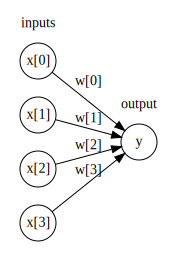

In [3]:
mglearn.plots.plot_logistic_regression_graph()

MLP에서는 가중치 합을 만드는 과정이 여러 번 반복되며, 먼저 중간 단계를 구상하는 은닉 유닛을 계산하고 이를 이용하여 최종 결과를 산출하기 우해 다시 가중치 합을 계산한다.

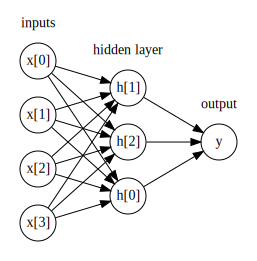

In [4]:
mglearn.plots.plot_single_hidden_layer_graph()

모델은 많은 계수를 학습해야 한다. 이 계수는 각 입력과 은닉층의 은닉 유닛 사이, 그리고 각 은닉 유닛과 출력 사이마다 있다.
(이래서 신경망이라고 하는구나. 모든 망이 연결되어 있어서!)

여러 개의 가중치 합을 계산하는 것은 수학적으로 보면 하나의 가충치 합을 계산하는 것과 같다. 그래서 이 모델을 선형 모델보다 강력하게 만들려면 또 다른 기교가 필요하다. 각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 빈선형 함수인 렐루(ReLU)나 하이퍼볼릭 탄젠트(tanh)를 적용한다. 이 함수 결과의 가중치 합을 계산하여 출력 y 값을 만든다.

- 렐루 함수는 0 이하를 잘라버린다.
- tanh 함수는 낮은 입력값에 대해서는 -1로 수렵하고 큰 입력값에 대해서 +1로 수렴한다. 

\
비선형 함수는 결과적으로 신경망이 선형 모델에서 보다 훨씬 더 복잡한 함수를 학습할 수 있도록 해준다.

Text(0, 0.5, 'relu(x), tanh(x)')

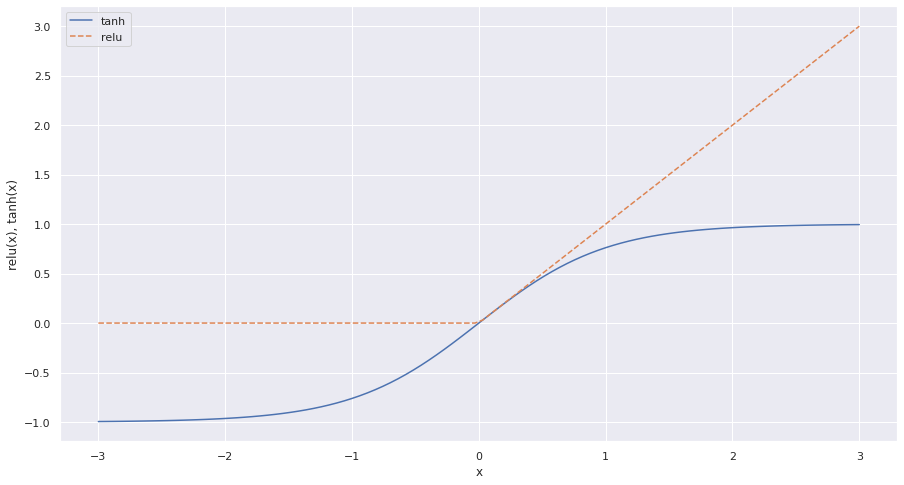

In [5]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle= '--', label='relu')
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

우리가 정해야 하는 중요한 매개변수는 은닉층의 유닛 개수이다. 소규모 데이터셋일 경우 10개 정도도 괜찮지만 매우 복잡한 데이터셋에서는 10,000개가 될 수도 있다

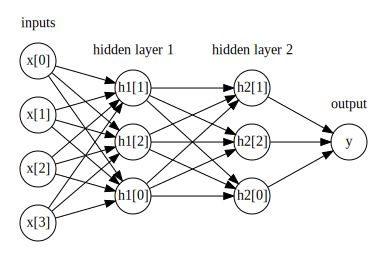

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

많은 은닉층으로 구성된 대규모의 신경망이 생기면서 이를 딥러닝이라고 부르게 되었다.

## 신경망 튜닝

two_moons 데이터셋에 분류를 위한 다층 퍼셉트론(MLP) 구현인 MLPClassifier를 적용해보자.

Text(0, 0.5, 'feature 1')

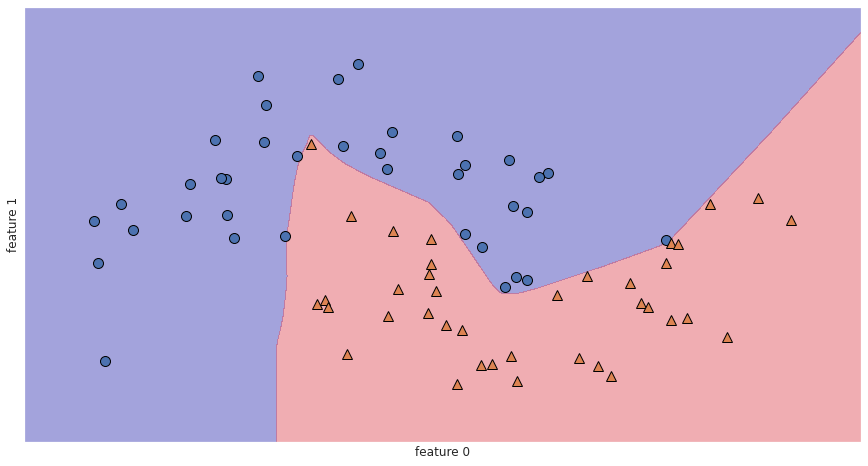

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

그림에서 보듯 신경망은 매우 비선형적이지만 비교적 매끄러운 결정 경계를 만들었다.
사용한 최적화 알고리즘은 solver='lbfgs'이다
MLP는 기본적으로 은닉 유닛 100개를 사용한다. 이런 작은 데이터셋에는 과분하다. 따라서 은닉 개수를 줄여도 여전히 좋은 결과를 얻을 수 있다

Text(0, 0.5, 'feature 1')

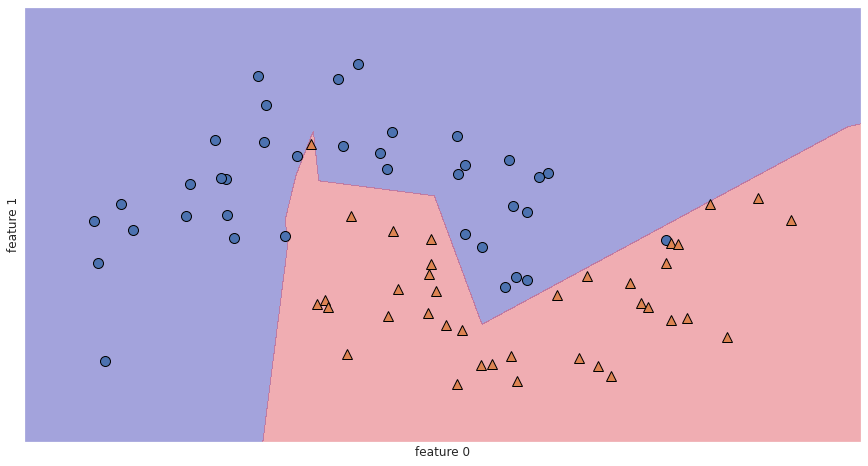

In [8]:
# 은닉유닛 10개
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_fun=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

은닉 유닛이 10개여서 결정 경계가 조금 날카로워졌다. 
기본 비선형 함수는 럴루이다. 은닉층이 하나이므로 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 구성된다. 더 매끄러운 경계를 원한다면 은닉 유닉을 추가하거나 은익층을 추가하거나, tahn 함수를 사용할 수 있다.

Text(0, 0.5, 'feature 1')

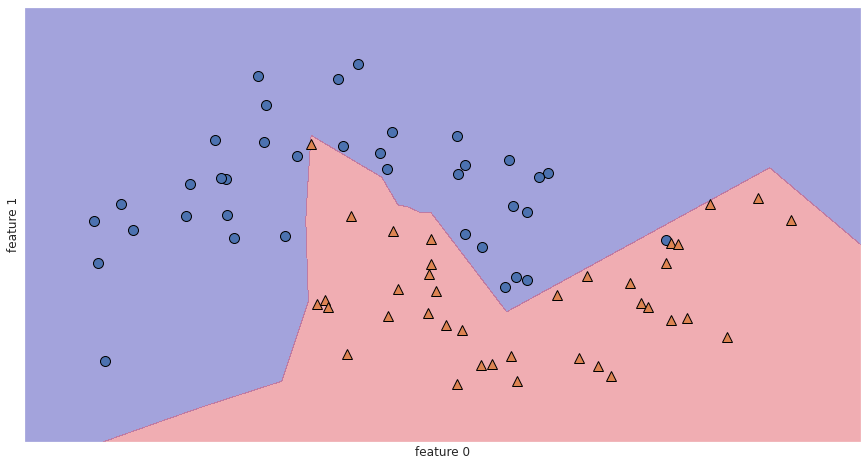

In [9]:
# 유닛 10개, 은닉층 2개
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

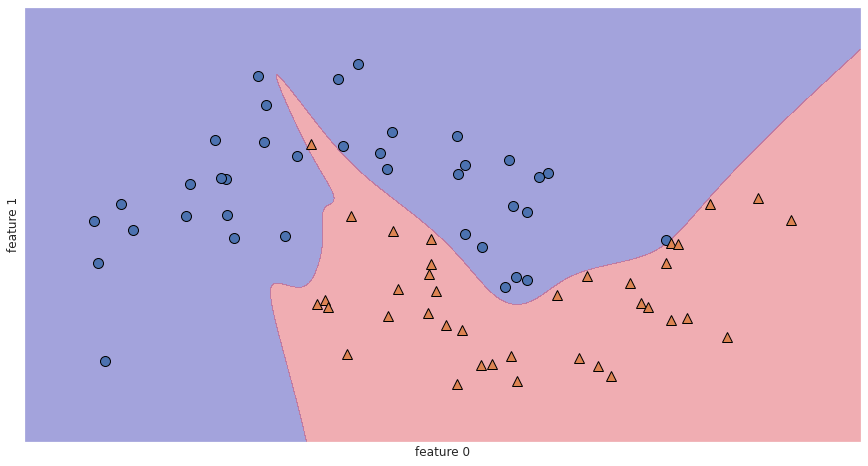

In [10]:
# 10개 유닛, 2개 은닉층, tanh 함수(활성화 함수)를 사용

mlp = MLPClassifier(solver='lbfgs', activation= 'tanh',random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

또한 리지 회귀와 선형 분류기에서 한 것처럼, L2 페널티를 사용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어할 수도 있다.

MLP에서도 선형 회귀 모델과 비슷하게 alpha 가 매개변수 역할을 한다.

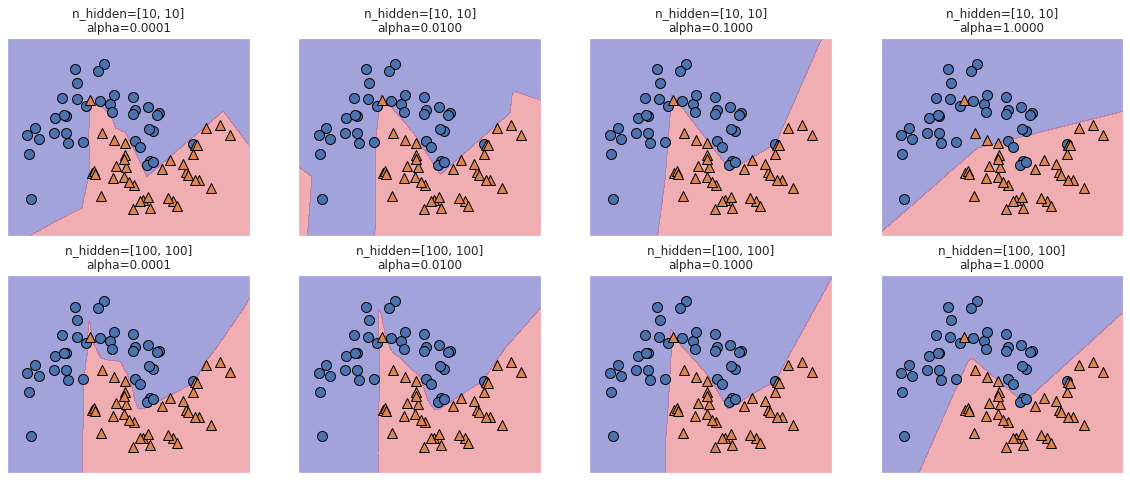

In [11]:
# 기본 2개 은닉층/ 10개 유닛, 100개 유닛 / alpha 값이 미치는 영향/ 시각화
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))



신경망의 복잡도를 제어하는 방법은 많다.
은닉층 수, 유닛수, 규제(alpha), 등등

신셩만에서는 학습을 시작하기 전 가중치를 무작위로 설정하며 이 무작위한 초기화가 모델 학습에 영향을 준다. 따라서 값은 매개변수를 사용했더라도 초깃값이 다르면 모델이 많이 달라진다.

신경망이 크고 복잡도도 적절하면 이런 점이 정확도에 미치는 영향은 크지 않지만 한상 기억하고 있어야 한다(특히 작은 신경망일 경우).

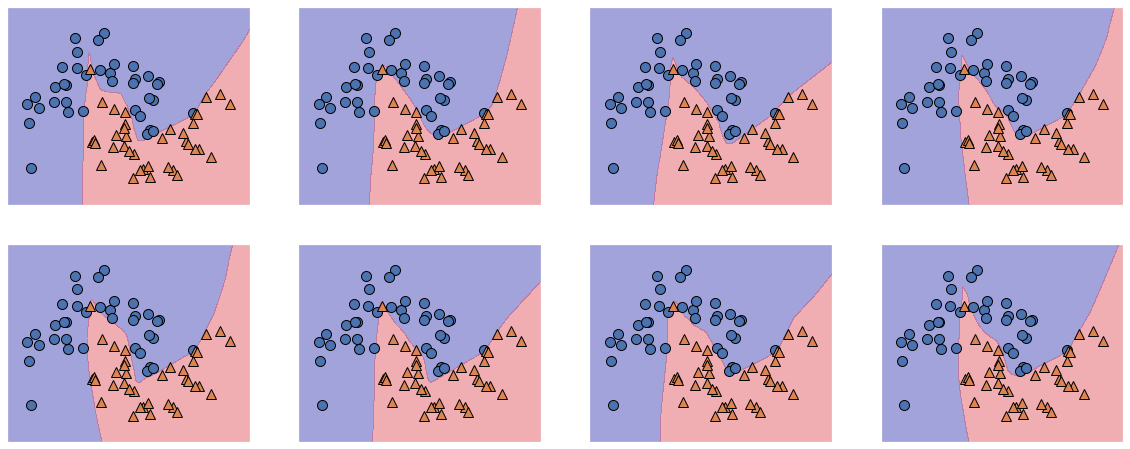

In [12]:
# 같은 매개변수, 다른 초깃값
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
  mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
  mlp.fit(X_train, y_train)
  mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:,1], y_train, ax=ax)

In [5]:
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최댓값:\ㅜ\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:\ㅜ
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test,y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


다른 모델만큼에 성능은 아니다. 신경망도 SVC와 동일하게 모든 입력 특성을 평균은 0, 분산은 1이 되도록 변경하는 것이 좋다. 
이제 이 조건에 맞도록 데이터의 스케일을 맞춰보자. 3장에서 StandardScaler 함수도 있지만 그건 다음에 쓰겠다.

In [14]:
# 훈련 세트 각 특성의 평균으 계산한다.
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준편차를 계산한다.
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면 
# 평균 0, 표준편차가 1인 데이터로 변환된다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 같은 변환을 테트스 세트에도 한다.
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

# 경고 출력 최대 반복횟수에 도달했음
# 이는 모델을 학습시키는 adam 알고리즘에 관현한 것, 이 경고가 나오면 반복횟수룰 늘려야 함.

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


In [15]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test))) 

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


반복 횟수를 늘려서 훈련 세트와 테스트 세트 성능을 올렸다. 하지만 훈련셋과 테스트셋 사이에 성능차이가 있으므로 일반화 성능을 올리기 위해 모델의 복잡도를 낮춰야 할 것으로 보인다.
여기서는 매개변수 alpha를 증가시켜(0.0001 > 1) 규제를 강화시켜 복잡도를 낮추는 방법을 써보겠다.

In [16]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test))) 

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


지금까지 나온 가장 좋은 모델의 성능과 비슷하다.
신경망은 어떻게 학습하는지 분석할 수 있지만 선형 모델이나 트리 모델보다는 시각화가 까다롭다. 모델의 가중치를 확인해보면 무엇이 학습됐는지 알아볼 수 있다. 이와 관련한 예를 [Scikit-learn 예제](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html) 에서 볼 수 있다.

유방암 데이터셋 같은 경우 조금 어렵다. 다음은 입력과 은닉층 사이의 학습된 가중치를 보여준다. 이 그림은 행은 30개의 입력 특성에 해당하며 열은 100개의 은닉 유닛에 해당한다. 밝은 색은 큰 앵수 값을 나타내고 어두운 색은 음수 값을 나타낸다.

In [23]:

mlp.coefs_[0]

array([[ 1.38710846e-02, -2.50121951e-02,  3.66222579e-02, ...,
        -3.47572622e-02, -2.24282383e-03, -1.97638723e-02],
       [ 1.26462143e-02, -6.82790623e-02,  3.70303247e-02, ...,
        -3.34389785e-02, -1.21200193e-02, -6.54680585e-02],
       [ 8.50428302e-03, -2.63297307e-02,  2.95094391e-02, ...,
        -1.72355685e-02,  1.05053722e-03, -1.30428184e-02],
       ...,
       [ 3.01969223e-03, -5.25847578e-02,  6.51799188e-02, ...,
        -4.07129917e-02, -3.25647552e-03, -3.30615217e-02],
       [-1.19219311e-03, -2.78480036e-02,  2.08436140e-02, ...,
        -2.74572097e-02,  5.09456645e-05, -2.03324679e-02],
       [-2.15747657e-02, -2.94202234e-02,  3.25639515e-02, ...,
        -2.14904553e-02, -4.01600447e-03, -2.92891532e-02]])

Text(0, 0.5, 'input feature')

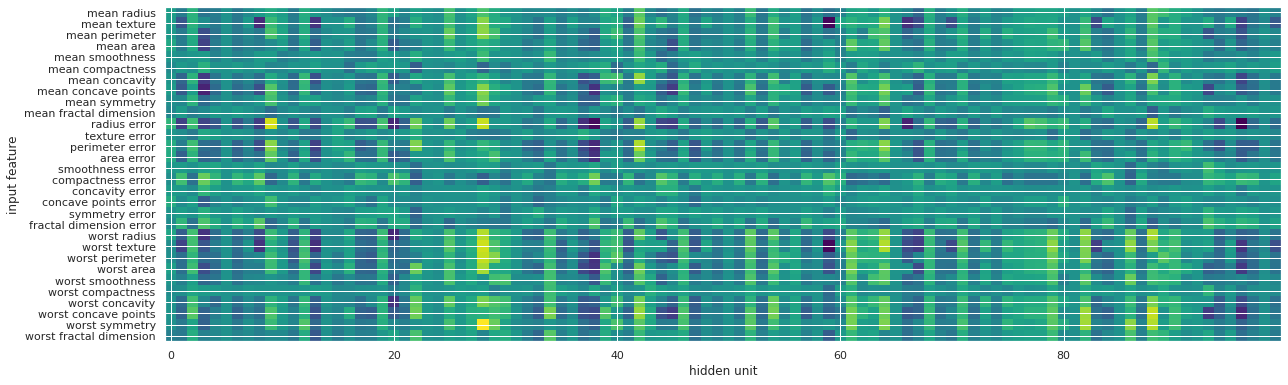

In [29]:
# mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
# mlp.fit(X_train_scaled, y_train)
plt.figure(figsize=(20, 7))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('hidden unit')
plt.ylabel('input feature')

모든 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하다고 추론할 수 있다. "smoothness error" 와 "fractal dimension error" 사이에 있는 특성과 "mean smoothness"와 "mean compactness"가 다른 특성들보다 가중치가 낮다. 

은닉층과 출력층 사이의 가중치도 시각화할 수 있겠지만, 해석하긴 더 어렵다.
MLPClassifier 와 MLPRegressor는 일반적인 신경망 구조를 위한 손쉬운 인터페이스를 제곤하지만 전체 신경망 종류의 일부만 만들 수 있다. 더 복잡하고 대규모인 무델을 만들려면 scikit-learn을 넘어서 전문적인 딥러닝 라이브러리들을 살펴보자. 파이썬 사용자에게는 keras, lasngna, tensorflow 등이 널리 사용되고 있다.

lasagna는 theano 라이브러리 위애 구춘한 것이고,
keras는 tensorflow 와 theano 중에 선책할 수 있다. 이 라이브러리들은 신경망을 만드는 데 훨씬 유연한 인터페이스를 제공하고 있다. 
잘 알려진 딥러닝 라이브러리들은 모두 scikit-learn에서는 지원하지 않는 GPU를 사용하면 10에서 100배까지 빠르게 연산 할 수 있어서 대규모 데이터셋을 사용한 딥러닝 분양에서 필수이다.

## 결론

1. 장점 \
신경망은 머신러닝 분야의 많은 애플리케이션에서 최고의 모델로 다시 떠오르고 있다. 주요한 장점은 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다는 점이다. 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 신경망은 (분류와 회귀 모두) 다른 머신러닝 알고리즘을 뛰어넘는 성능을 낸다.

2. 단점 \
신경망은 크고 강력한 모델이라면 종종 학습이 오래 걸린다. 또한 앞서 보았듯이 데이터 전처리에 주의해야 한다. SVM과 비슷하게 모든 특성이 같은 의미를 가진 동질의 데이이터에서 잘 작동한다. 다른 종류의 특성을 가진 데이터라면 트리기반 모델이 더 잘 작동할 수 있다. 신경망 매개변수 튜닝은 예술에 가까운 일이다.

\
### 신경망의 복잡도 추정
\
신경망에서 가장 중요한 매개변수는 은닉층의 개수과 각 은닉츠으이 유닛수이다.
처음은 한개 또는 두개로 시작해서 늘려가야 한다. 각 은닉층의 유닛 수는 보통 입력 특성의 수와 비슷하게 설정하지만 수천 초중반을 넘는 일은 거의 없다.

신경망의 모델 복잡도에 관해 도움이 될만한 측정치는 학습된 가충치 또는 계수의 수이다. 특성 100개와 은닉 유닛 100개를 가진 이진 분류와 1000개의 유닛과 비교하면 50배 가중치 차이가 난다.\

신경망 매개변수를 조정하는 일반적인 방법은 먼저 충분히 과대적합되어서 문제를 해결할 만한 큰 모델을 만들고, 훈련 데이터가 충분히 학습될 수 있다고 생각될 때 신경망 구조를 줄이거나 규제 강화를 위해 alpha 값을 증가시켜 일반화 성능을 향상시킨다.